In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [50]:
data = pd.read_csv('SBIN.BO.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-04,130.000000,137.199997,130.000000,136.619995,46.901642,8094740.0
1,2009-05-05,136.600006,138.699997,133.500000,134.365005,46.127506,8298370.0
2,2009-05-06,134.500000,137.595001,131.000000,132.369995,45.442619,9242210.0
3,2009-05-07,133.500000,137.500000,133.035004,136.695007,46.927395,5681380.0
4,2009-05-08,136.600006,137.500000,130.600006,132.514999,45.492397,6516970.0


In [51]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2639 non-null   object 
 1   Open       2628 non-null   float64
 2   High       2628 non-null   float64
 3   Low        2628 non-null   float64
 4   Close      2628 non-null   float64
 5   Adj Close  2628 non-null   float64
 6   Volume     2628 non-null   float64
dtypes: float64(6), object(1)
memory usage: 144.4+ KB


In [52]:
data = data.drop('Adj Close',axis=1)
data = data.dropna()
train_data = data[(data['Date'] >= '2009-05-04') & (data['Date'] <= '2017-04-03')]
test_data = data[(data['Date'] >= '2017-04-04') & (data['Date'] <= '2020-01-04')]
trainData = train_data.iloc[:,3:4].values

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2628 entries, 0 to 2638
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2628 non-null   object 
 1   Open    2628 non-null   float64
 2   High    2628 non-null   float64
 3   Low     2628 non-null   float64
 4   Close   2628 non-null   float64
 5   Volume  2628 non-null   float64
dtypes: float64(5), object(1)
memory usage: 143.7+ KB


In [54]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape[0]

1954

In [55]:
X_train = []
y_train = []

for i in range (60,len(trainData)): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [56]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1894, 60, 1)

In [57]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

# model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [58]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
60/60 - 12s - loss: 0.0178 - 12s/epoch - 201ms/step
Epoch 2/20
60/60 - 6s - loss: 0.0043 - 6s/epoch - 94ms/step
Epoch 3/20
60/60 - 6s - loss: 0.0042 - 6s/epoch - 103ms/step
Epoch 4/20
60/60 - 7s - loss: 0.0039 - 7s/epoch - 125ms/step
Epoch 5/20
60/60 - 7s - loss: 0.0031 - 7s/epoch - 121ms/step
Epoch 6/20
60/60 - 7s - loss: 0.0036 - 7s/epoch - 121ms/step
Epoch 7/20
60/60 - 7s - loss: 0.0035 - 7s/epoch - 125ms/step
Epoch 8/20
60/60 - 7s - loss: 0.0032 - 7s/epoch - 125ms/step
Epoch 9/20
60/60 - 7s - loss: 0.0029 - 7s/epoch - 122ms/step
Epoch 10/20
60/60 - 7s - loss: 0.0029 - 7s/epoch - 120ms/step
Epoch 11/20
60/60 - 7s - loss: 0.0027 - 7s/epoch - 119ms/step
Epoch 12/20
60/60 - 7s - loss: 0.0024 - 7s/epoch - 119ms/step
Epoch 13/20
60/60 - 7s - loss: 0.0025 - 7s/epoch - 119ms/step
Epoch 14/20
60/60 - 7s - loss: 0.0025 - 7s/epoch - 118ms/step
Epoch 15/20
60/60 - 7s - loss: 0.0022 - 7s/epoch - 120ms/step
Epoch 16/20
60/60 - 7s - loss: 0.0023 - 7s/epoch - 121ms/step
Epoch 17/20
60/6

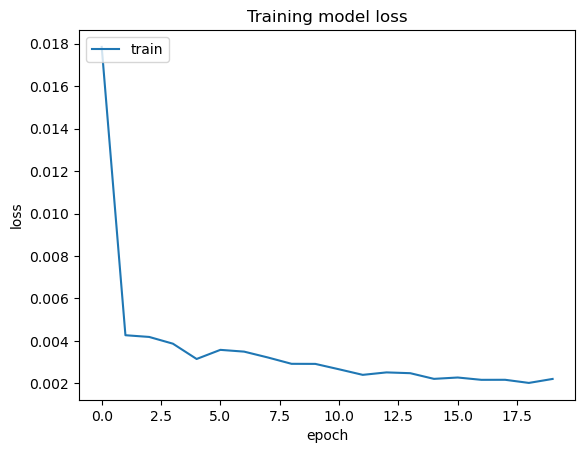

In [59]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [60]:
# testData = pd.read_csv('GS.csv')
# testData = testData.dropna()
testData = test_data.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(614, 60, 1)

In [61]:
y_pred = model.predict(X_test)
y_pred

20/20 [==============================] - 2s 33ms/step


array([[0.69212633],
       [0.6838879 ],
       [0.68209296],
       [0.6855735 ],
       [0.69615096],
       [0.7078534 ],
       [0.7212164 ],
       [0.73046404],
       [0.7376982 ],
       [0.74340314],
       [0.7497894 ],
       [0.75655663],
       [0.75981414],
       [0.762449  ],
       [0.7622887 ],
       [0.76024854],
       [0.76174486],
       [0.7675386 ],
       [0.7741913 ],
       [0.78170496],
       [0.7887574 ],
       [0.8065191 ],
       [0.8238733 ],
       [0.8340701 ],
       [0.83010495],
       [0.82315856],
       [0.8234225 ],
       [0.82240665],
       [0.8185143 ],
       [0.8084635 ],
       [0.7824574 ],
       [0.7504442 ],
       [0.72811794],
       [0.7168834 ],
       [0.7129262 ],
       [0.70955765],
       [0.70535797],
       [0.70513266],
       [0.70917416],
       [0.71346325],
       [0.7136153 ],
       [0.7105875 ],
       [0.70677656],
       [0.7039731 ],
       [0.7026953 ],
       [0.7021684 ],
       [0.69926614],
       [0.695

In [62]:
predicted_price = sc.inverse_transform(y_pred)

In [63]:
#Get root mean sqaure error (RMSE)
rmse = np.sqrt(np.mean(predicted_price-y_test)**2)
rmse

2.5507960654249153

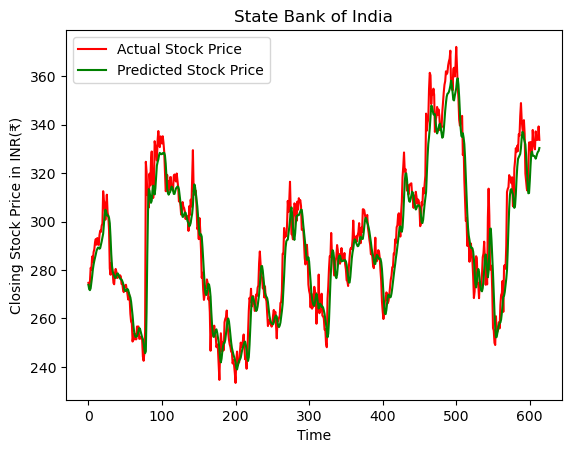

In [65]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('State Bank of India')
plt.xlabel('Time')
plt.ylabel('Closing Stock Price in INR(₹)')
plt.legend()
plt.show()